<a href="https://www.kaggle.com/code/maushamjha/disaster-tweets-nlp-80-naivebayes?scriptVersionId=104667751" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# importing libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.pipeline import Pipeline
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data_train=pd.read_csv('../input/nlp-getting-started/train.csv')
data_test=pd.read_csv('../input/nlp-getting-started/test.csv')

In [3]:
data_train.sample(3)

,id,keyword,location,text,target
138,198,airplane%20accident,"Salt Lake City, Utah",@crobscarla your lifetime odds of dying from a...,0
639,928,bioterrorism,"Sydney, New South Wales",#bioterrorism Authorities allay #glanders fear...,1
1383,1994,bush%20fires,NaN,One thing you can be sure of. There will never...,0


In [4]:
data_train.shape

(7613, 5)

In [5]:
data_test.sample(4)

,id,keyword,location,text
1156,3809,detonate,World Wide,Apollo Brown ÛÒ Detonate feat. M.O.P.: Produc...
2348,7846,quarantined,"darwins, au",Reddit's new content policy goes into effect m...
851,2798,curfew,NaN,! Sex-themed e-books given curfew in Germany o...
2099,7040,mayhem,NaN,Tonight It's Going To Be Mayhem @ #4PlayThursd...


In [6]:
data_test.shape

(3263, 4)

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
data_train.isnull().sum()/data_train.shape[0]*100

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

In [9]:
data_train.duplicated().sum()

0

In [10]:
data_train['location'].value_counts()
#there are so many categories which is appearing only once so we can make a single category by combining all

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

<AxesSubplot:>

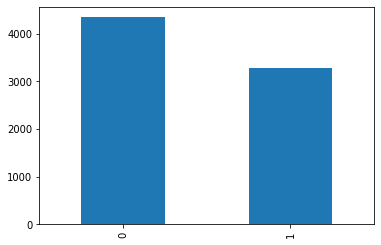

In [11]:
data_train['target'].value_counts().plot(kind='bar')

<AxesSubplot:>

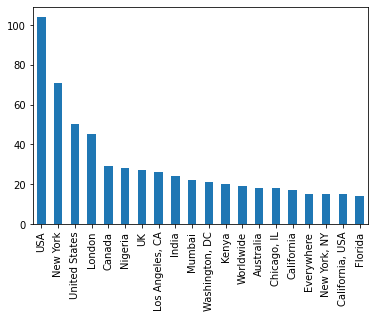

In [12]:
data_train['location'].value_counts()[0:20].plot(kind='bar')

<AxesSubplot:>

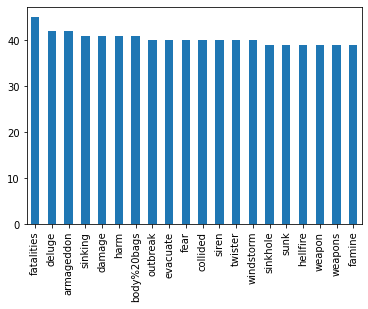

In [13]:
data_train['keyword'].value_counts()[0:20].plot(kind='bar')

<AxesSubplot:>

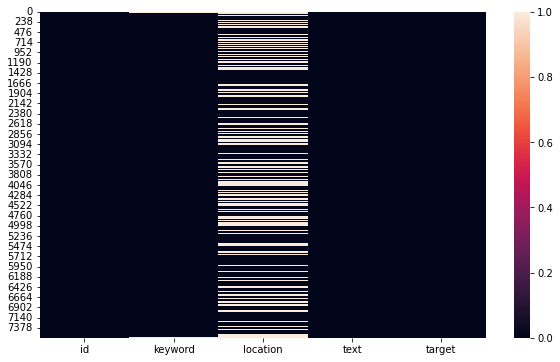

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(data_train.isnull())

# MAKING COLUMN TRANSFORMER TO EASILY PERFORM ONEHOT ENCODING

In [15]:
transformer=ColumnTransformer(transformers=[
             ('trf1',SimpleImputer(strategy='most_frequent'),[0]),
             ('trf3',SimpleImputer(strategy='constant'),[1])
               ],remainder='passthrough')
transformer1=ColumnTransformer(transformers=[
    ('trf4',OneHotEncoder(drop='first',sparse=False,handle_unknown='ignore'),[0,1])
       ],remainder='passthrough')

# MAKING PIPELINE:

In [16]:

pipe=Pipeline([
    ('transformer',transformer),
    ('transformer1',transformer1),
    
      ])

In [17]:
array_keyword_location=pipe.fit_transform(data_train.drop(columns=['id','text','target']))
array_keyword_location1=pipe.fit_transform(data_test.drop(columns=['id','text']))

In [18]:
array_keyword_location

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
pipe.named_steps

{'transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('trf1',
                                  SimpleImputer(strategy='most_frequent'), [0]),
                                 ('trf3', SimpleImputer(strategy='constant'),
                                  [1])]),
 'transformer1': ColumnTransformer(remainder='passthrough',
                   transformers=[('trf4',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse=False),
                                  [0, 1])])}

# now work on text column:
# CREATE 3 DIFFERENT COLUMNS CHAR_LENGTH,WORD_LENGTH,SENTENCE_LENGTH

In [20]:
data_train['total_character']=data_train['text'].apply(len)
data_train['total_word']=data_train['text'].apply(lambda x : len(word_tokenize(x)))
data_train['total_sentence']=data_train['text'].apply(lambda x : len(sent_tokenize(x)))
data_train

,id,keyword,location,text,target,total_character,total_word,total_sentence
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,14,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,8,2
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,24,2
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,9,1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,13,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,24,2
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,15,2
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,21,2


# PERFORMING EDA ON 3 NEW COLUMNS:

<AxesSubplot:ylabel='Frequency'>

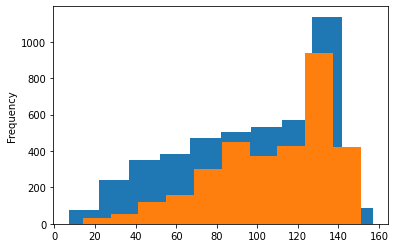

In [21]:
data_train[data_train['target']==0]['total_character'].plot(kind='hist')
data_train[data_train['target']==1]['total_character'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

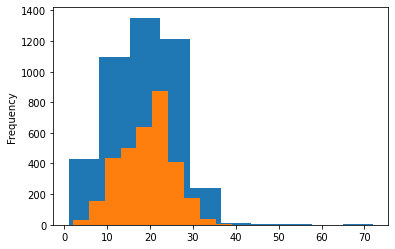

In [22]:
data_train[data_train['target']==0]['total_word'].plot(kind='hist')
data_train[data_train['target']==1]['total_word'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

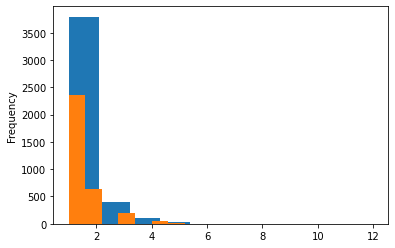

In [23]:
data_train[data_train['target']==0]['total_sentence'].plot(kind='hist')
data_train[data_train['target']==1]['total_sentence'].plot(kind='hist')

# TEXT PREPROCESSING:

In [24]:
data_train['text']=data_train['text'].str.lower()
data_test['text']=data_test['text'].str.lower()
from nltk import word_tokenize
data_train['text']=data_train['text'].apply(lambda x:word_tokenize(x))
data_test['text']=data_test['text'].apply(lambda x:word_tokenize(x))
def remove_special_char(list):
    y=[]
    for string in list:
        if string.isalnum():
            y.append(string)
    return y
data_train['text']=data_train['text'].apply(lambda x:remove_special_char(x))
data_test['text']=data_test['text'].apply(lambda x:remove_special_char(x))
from nltk.corpus import stopwords
import string
def useful_words(list):
    y=[]
    for text in list:
        if text not in stopwords.words('english') and text not in string.punctuation:
                y.append(text)
    return y
data_train['text']=data_train['text'].apply(lambda x:useful_words(x))
data_test['text']=data_test['text'].apply(lambda x:useful_words(x))
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def stemming(list):
    y=[]
    for text in list:
        y.append(ps.stem(text))
    return y
data_train['text']=data_train['text'].apply(lambda x:stemming(x)) 
data_train['text']=data_train['text'].apply(lambda x:" ".join(x))
data_test['text']=data_test['text'].apply(lambda x:stemming(x)) 
data_test['text']=data_test['text'].apply(lambda x:" ".join(x))

In [25]:
data_train

,id,keyword,location,text,target,total_character,total_word,total_sentence
0,1,NaN,NaN,deed reason earthquak may allah forgiv us,1,69,14,1
1,4,NaN,NaN,forest fire near la rong sask canada,1,38,8,2
2,5,NaN,NaN,resid ask place notifi offic evacu shelter pla...,1,133,24,2
3,6,NaN,NaN,peopl receiv wildfir evacu order california,1,65,9,1
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1,88,18,1
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,two giant crane hold bridg collaps nearbi home...,1,83,13,1
7609,10870,NaN,NaN,thetawniest control wild fire california even ...,1,125,24,2
7610,10871,NaN,NaN,utc 5km volcano hawaii http,1,65,15,2
7611,10872,NaN,NaN,polic investig collid car littl portug rider s...,1,137,21,2


# VISUALISNG THE MOST FREQUENT WORDS AND THE SIZE OF WORDS SIGNIFIES IT'S FREQUENCY:

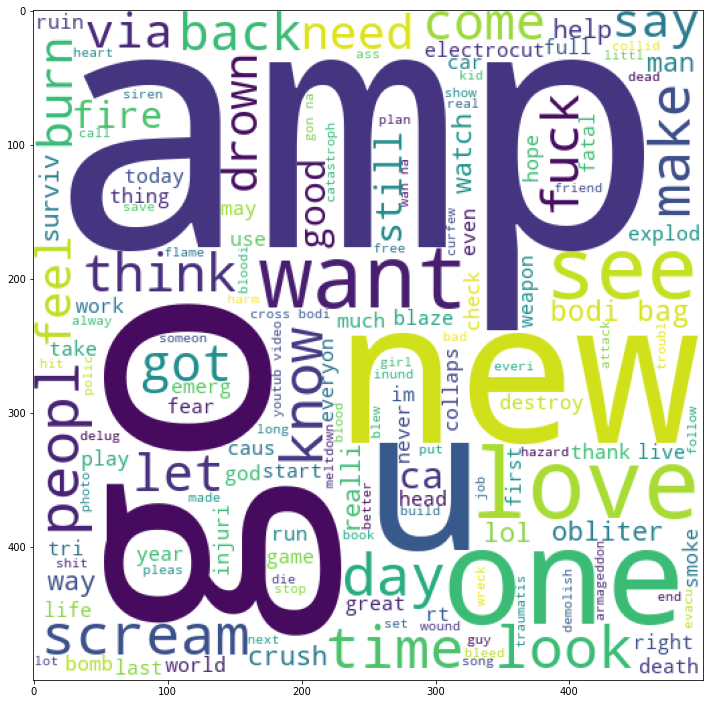

In [26]:
plt.figure(figsize=(12,15))
wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')
w_c=wc.generate(data_train[data_train['target']==0]['text'].str.cat(sep=" "))
plt.imshow(w_c)

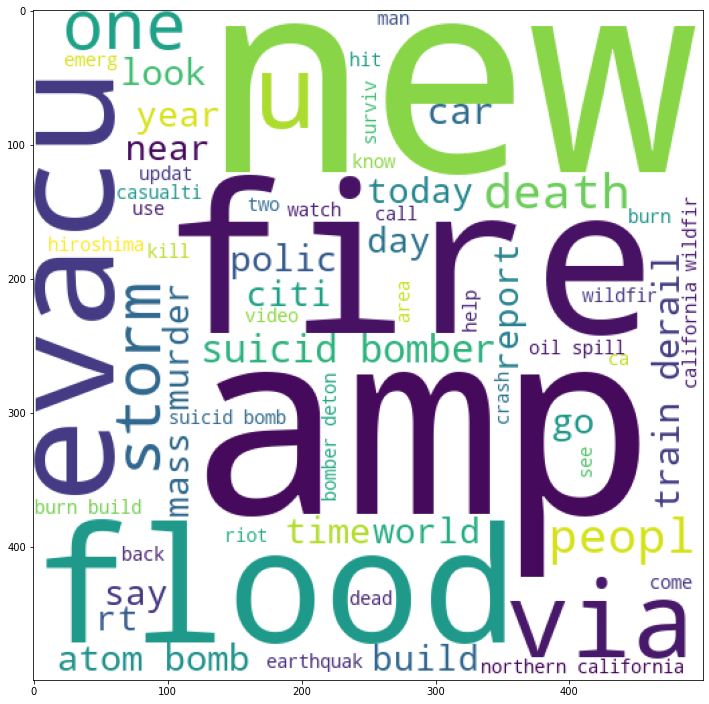

In [27]:
plt.figure(figsize=(12,15))

wc=WordCloud(height=500,width=500,min_font_size=10,background_color='white')
w_c=wc.generate(data_train[data_train['target']==1]['text'].str.cat(sep=" "))
plt.imshow(w_c)

# Vectorizing text using TFIDF:
# i have performed countvectorizer and n-grams but i got best result after using TFIDF:

In [28]:
tfidf=TfidfVectorizer(max_features=3000)
x=tfidf.fit_transform(data_train['text']).toarray()
test=tfidf.fit_transform(data_test['text']).toarray()
y=data_train['target'].values

# Train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=56,stratify=y)

# model formation:

In [30]:
gb=GaussianNB()
mb=MultinomialNB()
bb=BernoulliNB()
def train(model):
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    print(model)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(accuracy_score(y_test,y_predict))

In [31]:
l=[gb,mb,bb]
for model in l:
    train(model)

GaussianNB()
[[555 531]
 [151 667]]
              precision    recall  f1-score   support

           0       0.79      0.51      0.62      1086
           1       0.56      0.82      0.66       818

    accuracy                           0.64      1904
   macro avg       0.67      0.66      0.64      1904
weighted avg       0.69      0.64      0.64      1904

0.6418067226890757
MultinomialNB()
[[973 113]
 [263 555]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1086
           1       0.83      0.68      0.75       818

    accuracy                           0.80      1904
   macro avg       0.81      0.79      0.79      1904
weighted avg       0.81      0.80      0.80      1904

0.8025210084033614
BernoulliNB()
[[970 116]
 [257 561]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1086
           1       0.83      0.69      0.75       818

    accuracy                    

# bernaulli and multinomial Naive Bayes is providing descent result

# submitting our prediction

In [32]:
predict=bb.predict(test)

In [33]:
submission=pd.DataFrame({'id':data_test['id'],'target':predict})

In [34]:
submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,1
3261,10874,1


In [35]:
submission.to_csv('submission_tfidf.csv' , index = False)